[[0.6979166666666666, 0.75, 0.6371527777777778, 0.75, 0.5104166666666666, 0.4895833333333333, 0.46875, 0.6961805555555556, 0.5659722222222222, 0.6961805555555556, 0.4652777777777778, 0.5104166666666666, 0.8506944444444444, 0.4861111111111111, 0.4635416666666667, 0.703125, 0.9774305555555556, 0.2899305555555556, 0.5659722222222222, 0.4704861111111111, 0.4895833333333333, 0.4704861111111111, 0.6961805555555556, 0.4635416666666667, 0.5121527777777778, 0.3420138888888889, 0.6371527777777778, 0.2482638888888889, 0.6961805555555556, 0.5104166666666666, 0.6979166666666666, 0.5121527777777778, 0.7361111111111112, 0.4670138888888889, 0.4670138888888889, 0.6805555555555556, 0.5121527777777778, 0.6961805555555556, 0.4045138888888889, 0.5121527777777778, 0.4652777777777778, 0.5121527777777778, 0.4652777777777778, 0.5121527777777778, 0.4895833333333333, 0.3489583333333333, 0.7100694444444444, 0.6961805555555556, 0.7361111111111112, 0.5659722222222222, 0.2899305555555556, 0.6770833333333334, 0.51041

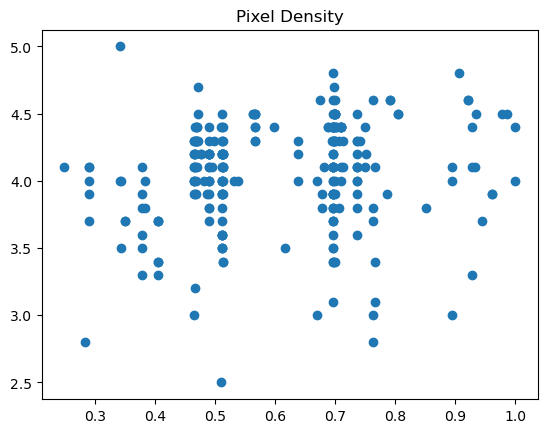

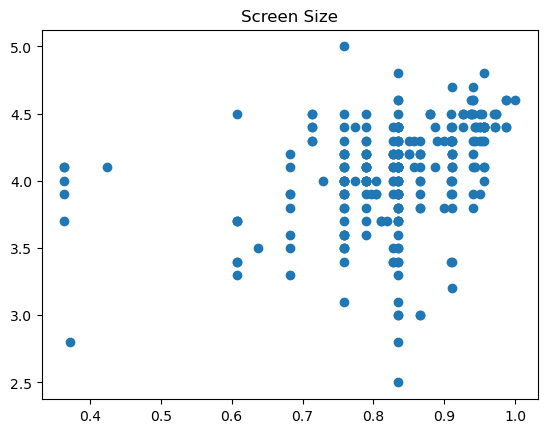

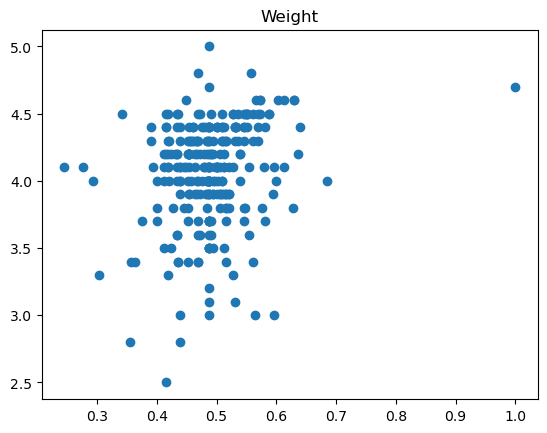

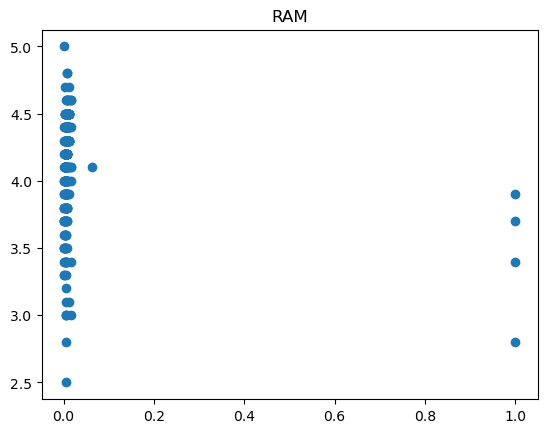

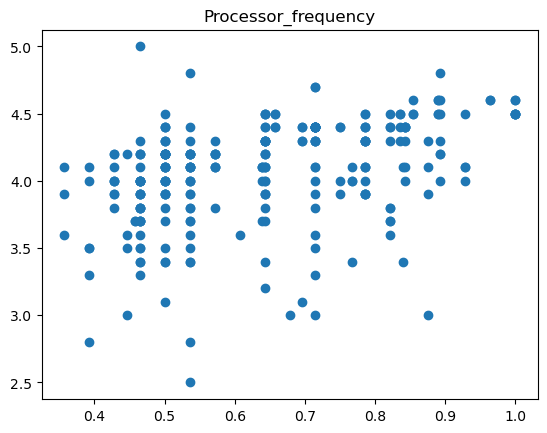

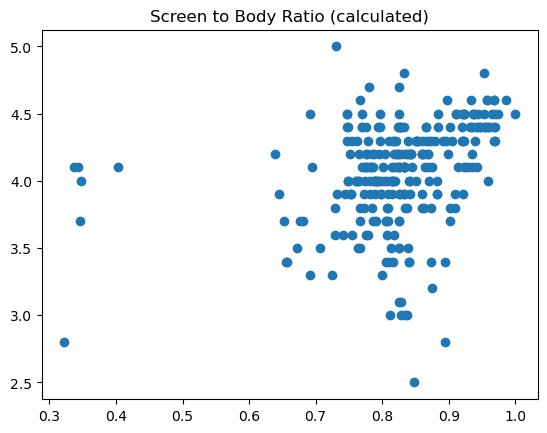

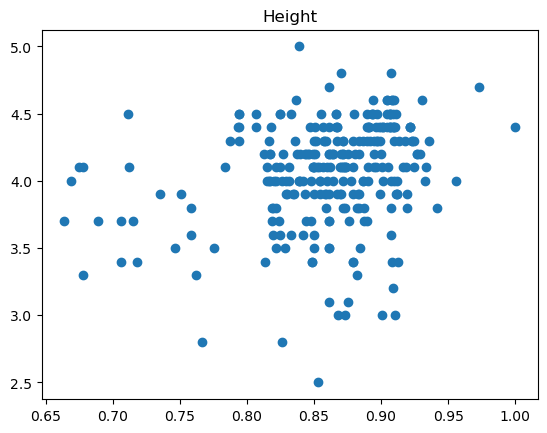

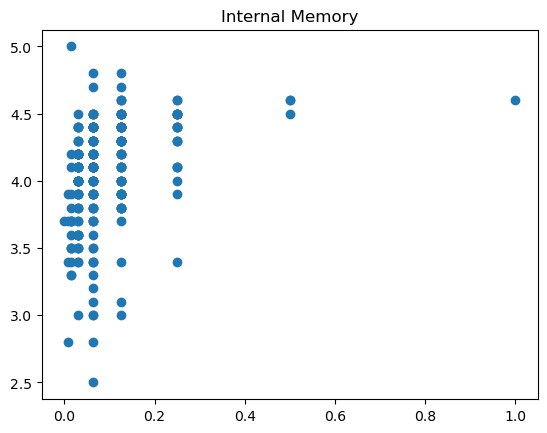

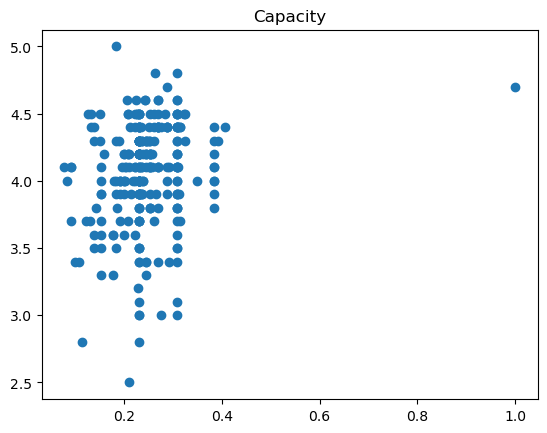

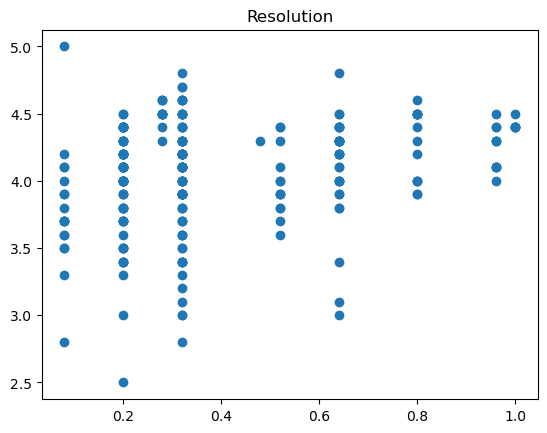

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df=pd.read_csv('lab9_data.csv')
# print(df.head())
totalcolumns=['Pixel Density','Screen Size','Weight','RAM','Processor_frequency','Screen to Body Ratio (calculated)','Height','Internal Memory','Capacity','Resolution']
input = df.loc[:, totalcolumns]
output= df.loc[:,['Rating']]
input_train1,input_test, output_train,output_test=train_test_split(input,output,random_state=0,train_size=.80)   

# print(input)


input_train=[]
# lst1=[1]*272
# print(lst1)
# input_train.append(lst1)

for i in totalcolumns:
    input_train.append((input_train1[i]/max(input_train1[i])).tolist())
print(input_train)

output_train=output_train['Rating'].tolist()

print(output_train)
# print(input_test)
# print(input_train)
def H(*arg):
    wlist=[*arg]
    # print(wlist)
    hlist=[wlist[i]*np.array(input_train[i]) for i in range(len(input_train))]
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)
    return sumlist
    # print(sumlist)
    # print(len(sumlist))
    # Jlist=[(sumlist[i]-output_train[i])**2 for i in range(len(output_train))]
    # print(sum(Jlist)/(2*len(Jlist)))
    # return sum(Jlist)/(2*len(Jlist))




# H(1,1,2,3,4,5,6,7,8,9,10)


def J(*arg):
    wlist=[*arg]
    hlist=[wlist[i]*np.array(input_train[i]) for i in range(len(input_train))] 
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)
        # print(sumlist)

    Jlist=[(sumlist[i]-output_train[i])**2 for i in range(len(output_train))]

    return sum(Jlist)/(2*len(Jlist))

def dir(*arg):
    wlist=[*arg]
    # print(wlist)
    hlist=[wlist[i]*np.array(input_train[i]) for i in range(len(input_train))]
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)

    dir=[]
    dirlist=[(sumlist[i]-output_train[i]) for i in range(len(output_train))]
    dir1=sum(dirlist)/len(dirlist)
    dir.append(dir1)
    for j in input_train:
        dirlist=[(sumlist[i]-output_train[i])*j[i] for i in range(len(output_train))]
        dir1=sum(dirlist)/len(dirlist)
        dir.append(dir1)
    return np.array(dir)

# dir(1,1,2,3,4,5,6,7,8,9,10)

def new_point(X,a):
    R=X-a*dir(X[0],X[1],X[2],X[3],X[4],X[5],X[6],X[7],X[8],X[9],X[10])
    return R


def J1(x,x0):
    a=x0-x*dir(x0[0],x0[1],x0[2],x0[3],x0[4],x0[5],x0[6],x0[7],x0[8],x0[9],x0[10])
    # print(delJ(a))
    # print(x,a)
    return J(x0[0],x0[1],x0[2],x0[3],x0[4],x0[5],x0[6],x0[7],x0[8],x0[9],x0[10])

def bracketing(x0):
    a1=0
    b1=0.5
    # print(a1,b1)
    l=b1-a1

    e1=1e-3

    while abs(l)>=e1 :
                    
        wm=(a1+b1)/2
        x1=a1+l/4
        x2=b1-l/4

        if J1(x1,x0=x0)<J1(wm,x0=x0):
            b1=wm
            wm=x1
                        
                        
        elif J1(x2,x0=x0)<J1(wm,x0=x0):
                        
            a1=wm
            wm=x2
                    
        else:
                        
            a1=x1
            b1=x2        
            l=b1-a1
            range2=(a1,b1)
                                 
    alpha=(a1+b1)/2
        # print(avg)
        # print(f"\n\nalpha = {alpha}")
    return alpha
        
def SGD_variable(w1,e,M):
    k=1
    a=bracketing(x0=w1)
    while np.linalg.norm(dir(w1[0],w1[1],w1[2],w1[3],w1[4],w1[5],w1[6],w1[7],w1[8],w1[9],w1[10]))>e and k<M :
        a=bracketing(x0=w1)
        w2=w1-a*dir(w1[0],w1[1],w1[2],w1[3],w1[4],w1[5],w1[6],w1[7],w1[8],w1[9],w1[10])
        w1=w2
        k=k+1

    for i in range(len(w1)):
        print ('w',i,'=',w1[i])
    # print('w0:',w1[0],'w1:',w1[1],'w2:',w1[2],'w0:',w1[0],'w0:',w1[0],'w0:',w1[0],'w0:',w1[0],'w0:',w1[0],'w0:',w1[0])
    # print('x coordinates:',x_coordinates)
    # print('y coordinates:',y_coordinates)
    return w1

# w=np.array([0,4,1,1,0,0,0,0,0,0,0])
w=np.array([2,0.1,0.2,0,0,0,0,0,0.1,0.1,0.1])

min = SGD_variable(w1=w,M=10,e=1e-7)

mse=2*J(min[0],min[1],min[2],min[3],min[4],min[5],min[6],min[7],min[8],min[9],min[10])
print('The mean squared error is:',2*J(min[0],min[1],min[2],min[3],min[4],min[5],min[6],min[7],min[8],min[9],min[10]))

max_wt=max(min)
max_index=max_wt.argmax()

mean=sum(output_train)/len(output_train)
print(mean)

def R2(mse):
    lst=[]
    for i in output_train:
        sq=(i-mean)**2
        lst.append(sq)
    r=sum(lst)
    # print(r)

    rsq=1-((mse*len(output_train))/(r*2))
    print('The R2 error is :',rsq)

R2(mse)

for i in range(len(input_train)):
    xcoordinates=i
    fig=plt.figure()
    plt.scatter(input_train[i],output_train)
    plt.title(totalcolumns[i])

print('Feautures with larger weights have a strong linear relationhsip\nHere the strongest linear relationship is with:', totalcolumns[max_index],'and is equal to:',max_wt)
